<a href="https://colab.research.google.com/github/mohamedHashem250/DeepLearningArchitecture/blob/main/PreTrainedModels/ALexNet/PlantClassification/AlexNet_PlantClassification_colabVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vipoooool_new_plant_diseases_dataset_path = kagglehub.dataset_download('vipoooool/new-plant-diseases-dataset')

print('Data source import complete.')


100%|██████████| 2.70G/2.70G [00:30<00:00, 94.4MB/s]

Extracting files...


Data source import complete.


In [4]:
vipoooool_new_plant_diseases_dataset_path

'/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2'

In [5]:
import os
os.listdir(vipoooool_new_plant_diseases_dataset_path)

['New Plant Diseases Dataset(Augmented)',
 'test',
 'new plant diseases dataset(augmented)']

In [3]:
# Importing Keras libraries and packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

![image.png](attachment:52838a67-3a52-49af-93d2-9975374c4850.png)

**Building CNN Based On AlexNet Architecture**

In [ ]:
#let's perfom AlexConv function: here we will not add any paramters, in the future we can return and update these parameters:
#ALexNet Feature Extraction Blocks from scratch
#let's build the Alex net from scratch
def AlexConv():
    return tf.keras.models.Sequential([

        #tf.keras.layers.Input(shape = (227,227,3)),
        #227 * 227 *3 ==>([(227-11)/4] +1) ==> 55 * 55 * 96
        tf.keras.layers.Conv2D(filters = 96, kernel_size = (11,11), strides = (4,4), padding = 'valid' ,activation = 'relu', input_shape =(227,227,3) ),

        # 55 * 55 * 96 ==>([(55-3)/2] +1) ==> 27 * 27 * 96
        tf.keras.layers.MaxPool2D(pool_size = (3,3), strides = (2,2)),

        #Hint:: if padding is 'same' , so p  = 2
        #27 * 27 * 96 ==> ([(27-5 + 2 * 2)] + 1) ==> 27 * 27 * 256
        tf.keras.layers.Conv2D(filters = 256, kernel_size  = (5,5), strides = (1,1), padding  = 'same', activation = 'relu'),

        #27 * 27 * 256 ==> ([(27-3)/2] + 1) ==> 13 * 13 * 256
        tf.keras.layers.MaxPool2D(pool_size = (3,3),strides = (2,2)),

        #Hint:: if padding is 'same' , so p  = 1
        #13 * 13 * 256 ==> ([(13-3 + 2 * 1)] + 1) ==> 13 * 13 * 384
        tf.keras.layers.Conv2D(filters = 384, kernel_size = (3,3),strides= (1,1),padding= 'same'),

        #Hint:: if padding is 'same' , so p  = 1
        #13 * 13 * 384 ==> ([(13-3 + 2 * 1)] + 1) ==> 13 * 13 * 384
        tf.keras.layers.Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'),

        #Hint:: if padding is 'same' , so p  = 1
        #13 * 13 * 384 ==> ([(13-3 + 2 * 1)] + 1) ==> 13 * 13 * 256
        tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3),strides = (1,1), padding  = 'same'),

        #13 * 13 * 256 ==> ([(13-3)/2]+1) ==> 6 * 6 * 256
        tf.keras.layers.MaxPool2D(pool_size = (3,3), strides = (2,2)),
        ]
)

#let's perfom AlexFC() function: here we will not add any paramters, in the future we can return and update these parameters:
#ALexNet Feature Extraction Blocks from scratch
#let's build the Alex net from scratch
#build your own classifier:
def AlexFC():
    return  tf.keras.models.Sequential([
            tf.keras.layers.Dense(units = 1024 ,activation = 'relu',input_shape = (9216,)),
            tf.keras.layers.Dropout(0.4),
            tf.keras.layers.BatchNormalization(),

            tf.keras.layers.Dense(units = 1024, activation = 'relu'),
            tf.keras.layers.Dropout(0.5),

            tf.keras.layers.Dense(units = 38, activation = 'softmax')
        ])


In [ ]:
class AlexNet(tf.keras.Model):
    def __init__(self, include_top = True, Image_dim = (227,227,3), num_classes = 38):
        super().__init__()
        #Define Conv layers:
        self.conv_layers = AlexConv()
        #Define the fully layers
        self.fc_layers = None
        if include_top:
            self.fc_layers = AlexFC()
        self.include_top = include_top

    def call(self, inputs, return_parts='combined'):
        #it's forward pass operation
        if not self.include_top:
            #the user need only convulation layers
            return self.conv_layers(inputs)
        #here the user need the whole architecture [return_parts='combined']
        return self.fc_layers(tf.keras.layers.Flatten()(self.conv_layers(inputs)))



In [ ]:
model = AlexNet(include_top = True)
inputs = tf.keras.layers.Input(shape = (227,227,3))

model(inputs)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 6, 6, 256)         3747200   
_________________________________________________________________
sequential_1 (Sequential)    (None, 38)                10530854  
Total params: 14,278,054
Trainable params: 14,276,006
Non-trainable params: 2,048
_________________________________________________________________


In [ ]:
# Compiling the Model
from keras import optimizers
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# image preprocessing
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
base_dir = "../input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)"

training_set = train_datagen.flow_from_directory(base_dir+'/train',
                                                 target_size=(227, 227),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(base_dir+'/valid',
                                            target_size=(227, 227),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

In [ ]:
# Define the path for saving weights
save_dir = './checkpoints'  # Create a directory named "checkpoints"
weightpath = os.path.join(save_dir, 'best_weights_.hdf5')
# Ensure the directory exists
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [ ]:
# checkpoint
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

#fitting images to CNN
history = model.fit_generator(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=10,
                         validation_steps=valid_num//batch_size,
                         callbacks=callbacks_list)


Epoch 1/10
548/549 [============================>.] - ETA: 2s - loss: 1.9803 - acc: 0.4351
Epoch 00001: val_acc improved from -inf to 0.57818, saving model to ./checkpoints/best_weights_.hdf5
549/549 [==============================] - 1262s 2s/step - loss: 1.9791 - acc: 0.4355 - val_loss: 1.3498 - val_acc: 0.5782
Epoch 2/10
548/549 [============================>.] - ETA: 1s - loss: 0.8614 - acc: 0.7335
Epoch 00002: val_acc improved from 0.57818 to 0.74487, saving model to ./checkpoints/best_weights_.hdf5
549/549 [==============================] - 962s 2s/step - loss: 0.8608 - acc: 0.7337 - val_loss: 0.8672 - val_acc: 0.7449
Epoch 3/10
548/549 [============================>.] - ETA: 1s - loss: 0.5594 - acc: 0.8232
Epoch 00003: val_acc improved from 0.74487 to 0.86582, saving model to ./checkpoints/best_weights_.hdf5
549/549 [==============================] - 941s 2s/step - loss: 0.5596 - acc: 0.8231 - val_loss: 0.4251 - val_acc: 0.8658
Epoch 4/10
548/549 [============================>.]

**Visualising Training Progress**

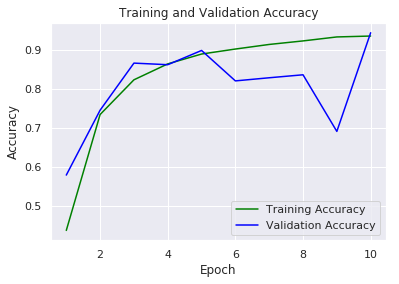

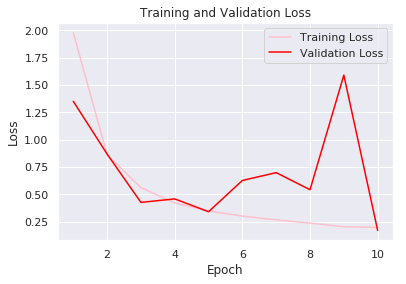

In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
import os

# Define the directory and file path
save_dir = './checkpoints'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

filepath = os.path.join(save_dir, "AlexNetclassifier.hdf5")

# Save the model in HDF5 format explicitly
model.save(filepath, save_format='h5')

TypeError: save() got an unexpected keyword argument 'save_format'

In [ ]:
#so we some some errors to save the entire model, Howeve, we saved  the weights
#lets's load this weights after defined the model

In [ ]:
import tensorflow as tf
print(tf.__version__)

1.11.0-rc1


**Loading Weights To The Model**

In [ ]:
# Check current directory
print("Current Directory:", os.getcwd())

# List all files in the current directory
print("Files in Directory:", os.listdir('./checkpoints/'))

Current Directory: /kaggle/working
Files in Directory: ['best_weights_.hdf5.index', 'best_weights_.hdf5.data-00000-of-00001', 'checkpoint']


In [ ]:
#firstly, we need to define the model:
PreTrained_model = AlexNet(include_top = True)
inputs = tf.keras.layers.Input(shape = (227,227,3))

PreTrained_model(inputs)
PreTrained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 6, 6, 256)         3747200   
_________________________________________________________________
sequential_5 (Sequential)    (None, 38)                10530854  
Total params: 14,278,054
Trainable params: 14,276,006
Non-trainable params: 2,048
_________________________________________________________________


In [ ]:
#load weights:
PreTrained_model.load_weights('./checkpoints/best_weights_.hdf5')

RuntimeError: Attempted to use a closed Session.

**Fine Tuning By Freezing Some Layers Of Our Model**

In [ ]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)

In [ ]:
# we chose to train the top 2 conv blocks, i.e. we will freeze
# the first 8 layers and unfreeze the rest:
print("Freezed layers:")
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = False


**Model Summary After Freezing**

**Predicting New Test Image(s)**

Following is our prediction:


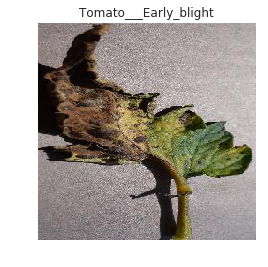

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "../input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight1.JPG"
new_img = image.load_img(image_path, target_size=(227, 227))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()